# <center>Home Credit Default Risk</center>

# Table of contents:
- <a href='#1'>1. Introduction/ Use Cases</a> 
- <a href='#2'>2. Data description</a>
- <a href='#3'>3. ETL</a> 
    - <a href='#3.1'>3.1 Imported parkages</a> 
    - <a href='#3.2'>3.2 Load Data</a> 
- <a href='#4'>4. Data examination AND transformation</a>   
    - <a href='#4.1'>4.1 Data shape</a> 
    - <a href='#4.2'>4.2 Distribution of the Target</a>
    - <a href='#4.3'>4.3 Missing values</a>:
        - <a href='#4.3.1'>4.3.1 Missing values for application_train</a>
        - <a href='#4.3.2'>4.3.1 Missing values for applicaiton_test</a>
    - <a href='#4.4'>4.4 Data type</a> 
        - <a href='#4.4.1'>4.4.1 Object data type ==> do one-hot encoder</a>    
        - <a href='#4.4.2'>4.4.2 int64 data type ==> do anomalies detection</a>
- <a href='#5'>5. Baseline</a>

***(...be continued)***


Source: 
- https://www.kaggle.com/c/home-credit-default-risk</center>
- https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/data
- https://www.kaggle.com/codename007/home-credit-complete-eda-feature-importance
- https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772



# <a id='1'>1. Introduction/ Use Cases</a>
* Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

* Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

* While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

# <a id='2'>2. Data description</a>
## Main data: info about loan and loan application at application time
* **application_train/application_test**: the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid. 

## A variety of alternative data:
* **bureau**: data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.

* **bureau_balance**: monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length. 

* **previous_application**: previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV. 

* **POS_CASH_BALANCE**: monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.

* **credit_card_balance**: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.

* **installments_payment**: payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment. 

## Columns description:
* **HomeCredit_columns_description**: contains descriptions for the columns in the 7 various data files.

## Diagram:
This diagram shows how all of the data is related:

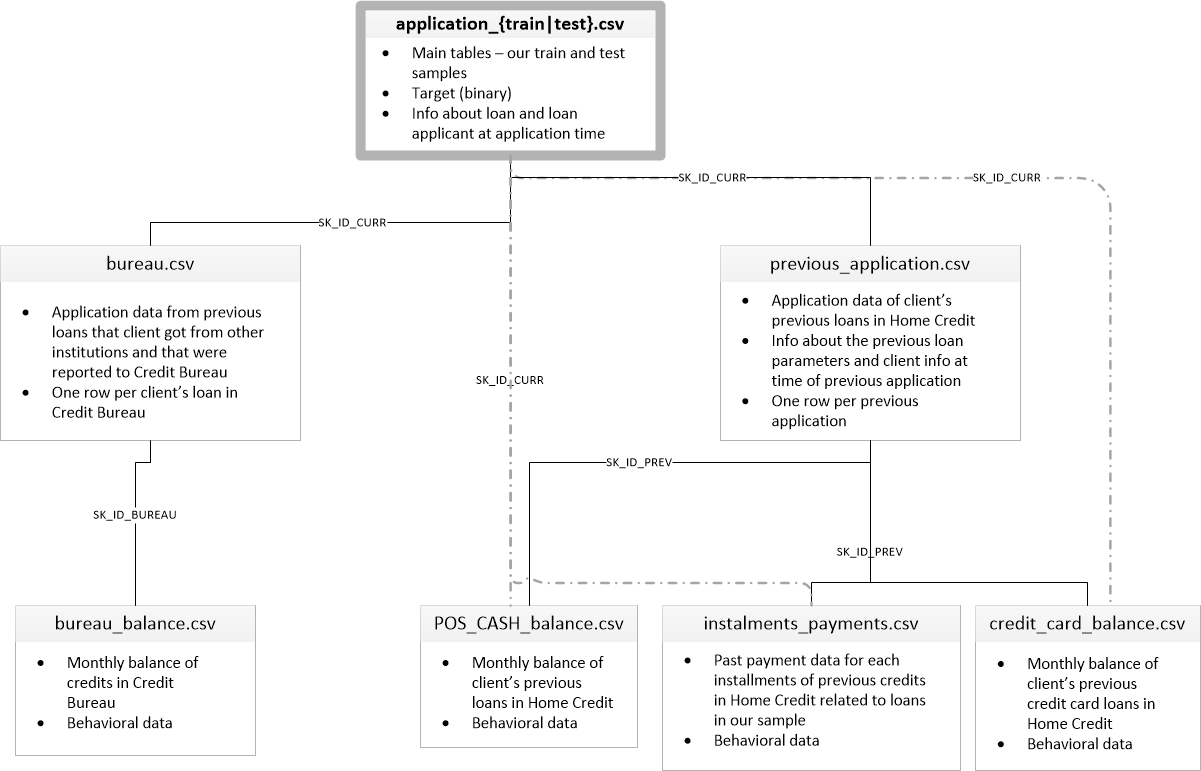


# <a id='3'>3. ETL</a>

## <a id='3.1'>3.1 Imported parkages:</a>

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

## <a id='3.2'>3.2 Load data:</a>

In [3]:
path = r"C:\Khoa\School\Home_Credit_Default_Risk\data/"
application_train = pd.read_csv(path + "application_train.csv")
application_test = pd.read_csv(path + "application_test.csv")

# <a id='4'>4. Data examination</a>

## <a id='4.1'>4.1 Data shape:</a>

In [4]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print("application_train's shape: ", application_train.shape)
print("application_test's shape: ", application_test.shape)

application_train's shape:  (307511, 122)
application_test's shape:  (48744, 121)


- The application_train has 307511 observations (each one a separate loan) and 122 features (variables) including the TARGET (the label we want to predict).

- The application_test has 48744 observations (each one a separate loan) and 121 features (variables)


## <a id='4.2'>4.2 Distribution of the Target:</a>

In [7]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'repaid': ['Yes','No'],
                   'numOfLoans': temp.values
                  })
df

,repaid,numOfLoans
0,Yes,282686
1,No,24825


In [8]:
trace = go.Pie(labels=df.repaid, values=df.numOfLoans, marker=dict(colors=['blue', 'red']))
layout = go.Layout(title = 'Distribution of repaid/ not repaid loans')
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)


In [9]:
trace = go.Bar(y=df.repaid, x=df.numOfLoans, text = df.numOfLoans, textposition = 'auto', orientation = 'h',
              marker=dict(color=['blue', 'red']))
layout = go.Layout(title = 'Number of repaid/ not repaid loans')
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

- There is about 8% of the total loans involved repaid problem.
- Target data is imbalanced: 8%(not repaid) vs 92%(repaid)

## <a id='4.3'>4.3 Missing values:</a>

In [10]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
                "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

### <a id='4.3.1'>4.3.1 Missing values for application_train</a>

In [11]:
# Missing values statistics
missing_values = missing_values_table(application_train)
missing_values

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


### <a id='4.3.2'>4.3.2 Missing values for application_test</a>

In [12]:
# Missing values statistics
missing_values = missing_values_table(application_test)
missing_values

Your selected dataframe has 121 columns.
There are 64 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as **XGBoost** that can handle missing values with no need for imputation. Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.

## <a id='4.4'>4.4 Data type</a>

In [14]:
# Number of each type of column
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

### <a id='4.4.1'>4.4.1 object data type ==> do one-hot encoder </a>   
Let's now look at the number of unique entries in each of the object (categorical) columns.

In [15]:
# Number of unique classes in each object column
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Most of the categorical variables have a fair small number of unique entries ==> apply One-Hot Encoding

In [16]:
# one-hot encoding of categorical variables
application_train = pd.get_dummies(application_train)
application_test = pd.get_dummies(application_test)

print('Training Features shape: ', application_train.shape)
print('Testing Features shape: ', application_test.shape)

Training Features shape:  (307511, 246)
Testing Features shape:  (48744, 242)


###  Aligning Training and Testing Data
There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to **align** the dataframes.

**We extract the target column from the training data because this is not in the testing data but we need to keep this information**

In [17]:
train_labels = application_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes. 
# axis = 1 to align the dataframes based on the columns and not on the rows!

application_train, application_test = application_train.align(application_test, join = 'inner', axis = 1)

# Add the target back in
application_train['TARGET'] = train_labels

print('Training Features shape: ', application_train.shape)
print('Testing Features shape: ', application_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 242)


### <a id='4.4.2'>4.4.2 int64 data type ==> do anomalies detection</a> 


In [18]:
# int64 data type colunms
application_train.select_dtypes('int64').head()

,SK_ID_CURR,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,100002,0,-9461,-637,-2120,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,100003,0,-16765,-1188,-291,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,-19046,-225,-2531,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,-19005,-3039,-2437,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,-19932,-3038,-3458,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


DAYS_BIRTH and DAYS_EMPLOYED are considered for detecting anomalies. 

The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. To see these stats in years, we can mutliple by -1 and divide by the number of days in a year

In [19]:
(application_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Those ages look reasonable ==> There are no outliers

In [20]:
(application_train['DAYS_EMPLOYED']/ -365).describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

That doesn't look right! The min value is about -1000 years!

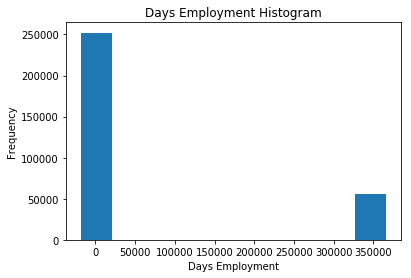

In [22]:
# Plot hist for DAYS_EMPLOYED
(application_train['DAYS_EMPLOYED']).plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')
plt.show()

In [23]:
anom_train = application_train[application_train['DAYS_EMPLOYED'] > 350000]
print('There are %d anomalous days of employment in application_train ' % len(anom_train))

There are 55374 anomalous days of employment in application_train 


In [24]:
anom_train['DAYS_EMPLOYED'].describe()

count     55374.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [25]:
anom_test = application_test[application_test['DAYS_EMPLOYED'] > 350000]
print('There are %d anomalous days of employment in application_test' % len(anom_test))

There are 9274 anomalous days of employment in application_test


In [26]:
anom_test['DAYS_EMPLOYED'].describe()

count      9274.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: DAYS_EMPLOYED, dtype: float64

All the anomalies have the exact same value **365243**

Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

In [27]:
# Create an anomalous flag column for the values 365243
application_train['DAYS_EMPLOYED_ANOM'] = application_train["DAYS_EMPLOYED"] == 365243

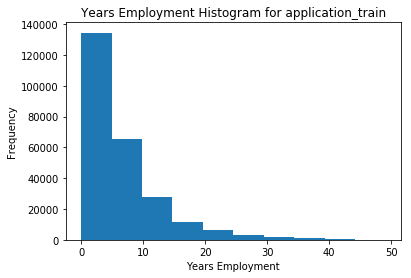

In [29]:
# Replace the anomalous values with nan
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

(application_train['DAYS_EMPLOYED']/-365).plot.hist(title = 'Years Employment Histogram for application_train')
plt.xlabel('Years Employment')
plt.show()

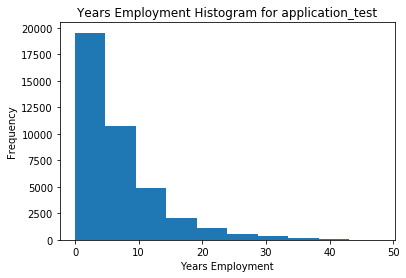

In [30]:
application_test['DAYS_EMPLOYED_ANOM'] = application_test["DAYS_EMPLOYED"] == 365243
application_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

(application_test['DAYS_EMPLOYED']/-365).plot.hist(title = 'Years Employment Histogram for application_test')
plt.xlabel('Years Employment')
plt.show()

application_train and application_test lool more reasonable after removing the outliers from **DAYS_EMPLOYED**

# <a id='5'>5. Baseline</a>
- We will use all of the features after encoding the categorical variables. We will preprocess the data by filling in the missing values (imputation) and normalizing the range of the features (feature scaling).

## Logistic Regression

In [40]:
from sklearn.preprocessing import MinMaxScaler, Imputer

In [33]:
# Drop the target from the training data and then copy to train data
if 'TARGET' in application_train:
    train = application_train.drop(columns = ['TARGET'])
else:
    train = application_train.copy()

In [38]:
# Copy of the test data
test = application_test.copy()

In [43]:
# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

In [44]:
# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Scaler on the training data
scaler.fit(train)

# Transform both training and testing data
train = scaler.transform(train)
test = scaler.transform(test)

In [53]:
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 243)
Testing data shape:  (48744, 243)


In [57]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression()

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now that the model has been trained, we can use it to make predictions. We want to predict the probabilities of not paying a loan, so we use the model predict.proba method. This returns an m x 2 array where m is the number of observations. The first column is the probability of the target being 0 and the second column is the probability of the target being 1 (so for a single row, the two columns must sum to 1). We want the probability the loan is not repaid, so we will select the second column.

In [69]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]


In [71]:
# Submission dataframe
submit = application_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()


C:\Users\kevin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,SK_ID_CURR,TARGET
0,100001,0.058429
1,100005,0.216230
2,100013,0.041124
3,100028,0.034517
4,100038,0.121215


In [74]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

The logistic regression baseline should score around **0.73789** when submitted.